In [1]:
# Part 1 - Create Summary Frame
# Total Rides
# Total Drivers
# Total Fares
# Average Fare per Ride
# Average Fare per Driver

In [2]:
#Prep
%matplotlib inline

import pandas as pd
import numpy as np

cityData_toLoad = "Resources/city_data.csv"
cityDataDF = pd.read_csv(cityData_toLoad)

rideData_toLoad = "Resources/ride_data.csv"
rideDataDF = pd.read_csv(rideData_toLoad)

pyberDataDF = pd.merge(rideDataDF, cityDataDF, how="left", on=["city", "city"])
pyberDataDF

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [3]:
#Split into separate DataFrames
urbanRidesDF = pyberDataDF[pyberDataDF["type"] == "Urban"]
suburbanRidesDF = pyberDataDF[pyberDataDF["type"] == "Suburban"]
ruralRidesDF = pyberDataDF[pyberDataDF["type"] == "Rural"]
urbanRidesDF

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [4]:
# Total Rides - Series and overall
totalRides = pyberDataDF.count()["ride_id"]
totalRidesSeries = pyberDataDF.groupby(["type"]).count()["ride_id"]
totalRidesSeries

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# Total Drivers - Series and overall
totalDrivers = cityDataDF["driver_count"].sum()
totalDriversSeries = cityDataDF.groupby(["type"]).sum()["driver_count"]
totalDriversSeries

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
# Total Fares - Series and overall
totalFares = pyberDataDF["fare"].sum()
totalFaresSeries = pyberDataDF.groupby(["type"]).sum()["fare"]
totalFaresSeries

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
# Average Fare per Ride - Series
avgRideFareSeries = totalFaresSeries / totalRidesSeries
avgRideFareSeries

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# Average Fare per Driver - Series
avgDriverFareSeries = totalFaresSeries / totalDriversSeries
avgDriverFareSeries

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#Create Summary Data Frame
pyberSummaryDF = pd.DataFrame(
    {"Total Rides": totalRidesSeries,
    "Total Drivers": totalDriversSeries,
    "Total Fares": totalFaresSeries,
    "Average Fare per Ride": avgRideFareSeries,
    "Average Fare per Driver": avgDriverFareSeries,
    })

#Format Summary DataFrame
pyberSummaryDF.index.name = None
pyberSummaryDF["Total Fares"] = pyberSummaryDF["Total Fares"].map("${:,.2f}".format)
pyberSummaryDF["Average Fare per Ride"] = pyberSummaryDF["Average Fare per Ride"].map("${:,.2f}".format)
pyberSummaryDF["Average Fare per Driver"] = pyberSummaryDF["Average Fare per Driver"].map("${:,.2f}".format)

pyberSummaryDF

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [10]:
#PART 2 - Create Multiple Line Plot fo the Sum of Fares for each City Type
# Rename/Clean merged dataframe
pyberDataDF.rename(columns = {
    'city': 'City', 
    'date':'Date',
    'fare':'Fare', 
    'ride_id': 'Ride Id',
    'driver_count': 
    'No. Drivers', 
    'type':'City Type'}, inplace=True)
pyberDataDF

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [11]:
#Set Index to Date Column
pyberDataDF.set_index("Date", drop = False, inplace = True)
pyberDataDF

,City,Date,Fare,Ride Id,No. Drivers,City Type
Date,,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural


In [12]:
#create copy with only Date, city, and Fare
pyberData_DateDF = pyberDataDF.loc[:,["Date", "City Type", "Fare"]].copy()
pyberData_DateDF.drop(["Date"], axis=1, inplace = True)

#Change to Date Time type
pyberData_DateDF.reset_index(inplace = True)
pyberData_DateDF["Date"] = pd.to_datetime(pyberData_DateDF["Date"])
pyberData_DateDF.set_index("Date", drop = True, inplace = True)
pyberData_DateDF

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [13]:
#Check Info - confirm index is a datetime
pyberData_DateDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [14]:
#7 Sum of Fares - type
fareSumSeries = pyberData_DateDF.groupby(["City Type","Date"]).sum()["Fare"]
#cityType_fareSumDF = pd.DataFrame
fareSumSeries

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:49    18.45
           2019-05-08 07:29:01    18.55
           2019-05-08 11:38:35    19.77
           2019-05-08 13:10:18    18.04
Name: Fare, Length: 2375, dtype: float64

In [15]:
#Reset the index
fareSumDF = pd.DataFrame(fareSumSeries)
fareSumDF.reset_index(inplace = True)
fareSumDF

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [16]:
#Create Pivot Table
#Create a pivot table DataFrame with the Date as the index and columns = 'City Type' 
#with the Fare for each Date in each row. 
#Note: There will be NaNs in some rows, which will be taken care of when you sum based on the date.
tableDF = pd.pivot_table(fareSumDF, values="Fare", index=["Date"], columns=["City Type"])
tableDF

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [17]:
janApriltableDF = tableDF.loc['2019-01-01':'2019-04-28',:]
janApriltableDF
#pyberData_DateDF = pyberDataDF.loc[:,["Date", "City Type", "Fare"]].copy()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [18]:
# Resample - W = Week
janApril_week_tableDF = janApriltableDF.resample("W").sum()
janApril_week_tableDF


City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


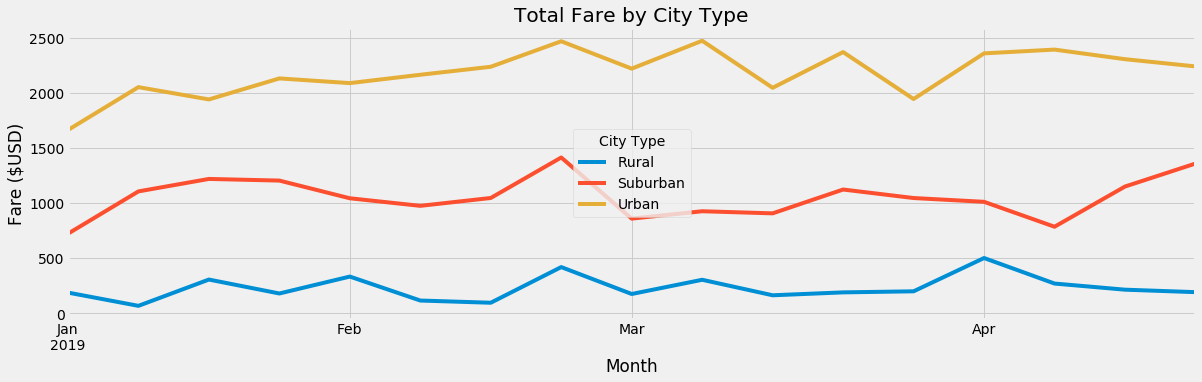

In [19]:
# Create & Format Data
import matplotlib as matplot
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
janApril_week_tableDF.plot(title = "Total Fare by City Type",
             figsize = (18, 5))
plt.xlabel("Month")
plt.ylabel("Fare ($USD)")
plt.savefig("analysis/TotalFare_CityType.png")
plt.show()
